In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [182]:
df = pd.read_csv('train_1.csv', header = 0).fillna(0)#, encoding = 'ISO-8859-1')
df.head(1)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0


In [183]:
def get_platform(page):
    splits = page.split('.org_')
    if len(splits) > 1:
        if splits[-1] not in ['all-access_spider', 'desktop_all-agents', 'mobile-web_all-agents', 'all-access_all-agents']:
            print page
        return splits[-1]
    else:
        print page
        return 'NaN'
    
df['Platform'] = df.Page.map(get_platform)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Platform
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,all-access_spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,all-access_spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,all-access_spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,all-access_spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,all-access_spider


In [184]:
def enum_map(unique_categorical):
    enums = {}
    for i in range(len(unique_categorical)):
        enums[unique_categorical[i]] = i
    return enums
    
platform_map = enum_map(df.Platform.unique())
print platform_map
def enum_platform(platform):
    global platform_map
    return platform_map[platform]
    
df.Platform = df.Platform.map(enum_platform)

{'desktop_all-agents': 1, 'all-access_all-agents': 3, 'mobile-web_all-agents': 2, 'all-access_spider': 0}


In [185]:
df.head(4)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Platform
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,0


In [186]:
df = df[df.Platform != 3]

In [187]:
df.columns[1:-1]

Index([u'2015-07-01', u'2015-07-02', u'2015-07-03', u'2015-07-04',
       u'2015-07-05', u'2015-07-06', u'2015-07-07', u'2015-07-08',
       u'2015-07-09', u'2015-07-10',
       ...
       u'2016-12-22', u'2016-12-23', u'2016-12-24', u'2016-12-25',
       u'2016-12-26', u'2016-12-27', u'2016-12-28', u'2016-12-29',
       u'2016-12-30', u'2016-12-31'],
      dtype='object', length=550)

In [188]:
# Aggregating on per language basis
def agg_by_platform(data):
    data_witout_page = data.drop(['Page'], axis=1)
    data_grouped_by_lang =  data_witout_page.groupby(['Platform']).sum()
    
    data_grouped_by_lang = data_grouped_by_lang.reset_index()
    return pd.melt(data_grouped_by_lang, id_vars=["Platform"], var_name="Date", value_name="Visit")

df_agg = agg_by_platform(df)

In [189]:
df_agg.head(5)

,Platform,Date,Visit
0,0,2015-07-01,664648.0
1,1,2015-07-01,39876738.0
2,2,2015-07-01,34097625.0
3,0,2015-07-02,619550.0
4,1,2015-07-02,40166627.0


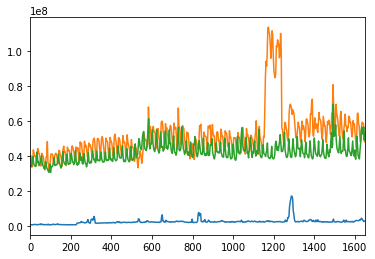

In [190]:
for i in range(3):
    df_agg[df_agg.Platform==i].Visit.plot()
    
# 0 : spider (blue)
# 1: desktop (orange)
# 2: mobile (green)

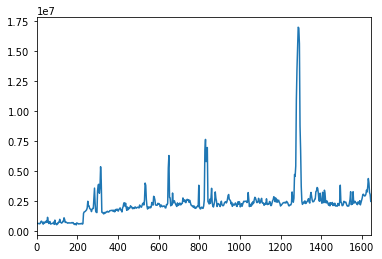

In [191]:
df_agg[df_agg.Platform==0].Visit.plot()

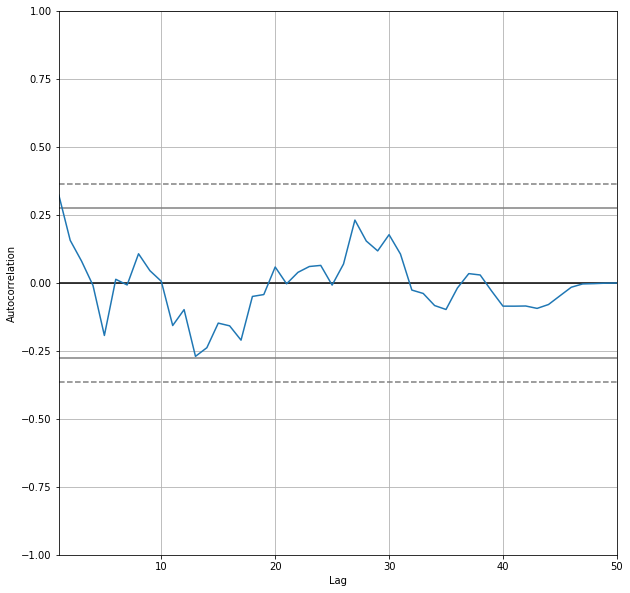

In [204]:
pd.tools.plotting.autocorrelation_plot(df_agg[df_agg.Platform==0].Visit[:50])
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [193]:
df_agg.values

array([[0, '2015-07-01', 664648.0],
       [1, '2015-07-01', 39876738.0],
       [2, '2015-07-01', 34097625.0],
       ..., 
       [0, '2016-12-31', 2598409.0],
       [1, '2016-12-31', 47980338.0],
       [2, '2016-12-31', 53370019.0]], dtype=object)

In [211]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

models = []
orders = [(3,1,1),(7,1,5),(5,1,2)]

test = []
predictions = []

for platform in range(3):
    series = df_agg[df_agg.Platform==platform].Visit # desktop
    X = series.values
    size = int(len(X) * 0.80)
    test.append([])
    print(len(test))
    train = X[0:size]
    test[platform] = X[size:len(X)]
    history = [x for x in train]
    predictions.append([])
    model = ARIMA(history, order=orders[platform])
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(steps=110)
    predictions[platform].extend(output[0])
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    models.append(model)

1
Test MSE: 227946008029.642
2


/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 22514865500743.520
3
Test MSE: 22271633385469.914


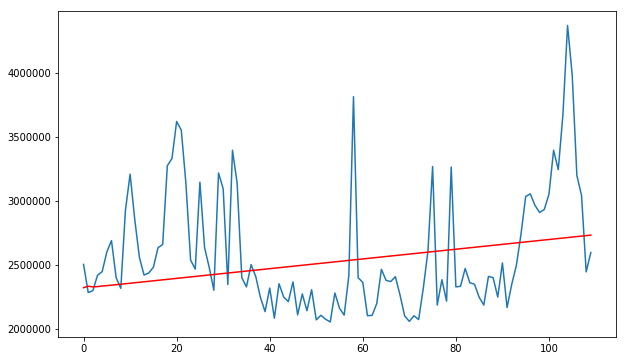

In [213]:
def plot_for_platform(platform):
    plt.plot(test[platform])
    plt.plot(predictions[platform], color='red')
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    plt.show()
    
plot_for_platform(0) # Spider

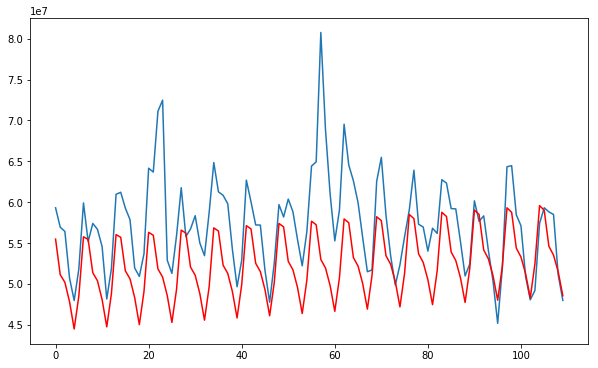

In [214]:
plot_for_platform(1) # Desktop

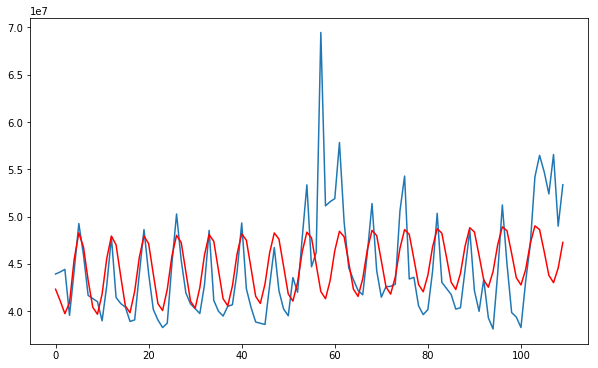

In [215]:
plot_for_platform(2) # Mobile